In [1]:
import pandas as pd
import numpy as np
import nltk

In [2]:
# data.to_csv('hotelreviews.csv',sep=',')
df = pd.read_csv('hotelreviews.csv')

In [3]:
df.drop('Unnamed: 0', 1, inplace =True)
df

,preprocessing_finished,Lemmatized,WordToken,Review,NegativeReview,PositiveReview,TripStyle
0,"['started', 'big', 'noise', 'worker', 'loading...","['am', 'started', 'big', 'noise', 'worker', 'l...","['am', 'started', 'big', 'noise', 'workers', '...",am started big noise workers loading wood d...,6 30 AM started big noise workers loading woo...,Style location rooms,Business
1,"['hotel', 'renovated', 'great', 'care', 'appre...","['this', 'hotel', 'is', 'being', 'renovated', ...","['this', 'hotel', 'is', 'being', 'renovated', ...",this hotel is being renovated with great care...,NaN,This hotel is being renovated with great care...,Business
2,"['public', 'area', 'lovely', 'room', 'wa', 'ni...","['public', 'area', 'are', 'lovely', 'and', 'th...","['public', 'areas', 'are', 'lovely', 'and', 't...",public areas are lovely and the room was nice...,NaN,Public areas are lovely and the room was nice...,Business
3,"['careful', 'still', 'renovating', 'building',...","['careful', 'they', 'are', 'still', 'renovatin...","['careful', 'they', 'are', 'still', 'renovatin...",careful they are still renovating the buildin...,Careful they are still renovating the buildin...,Great hotel original concept style,Business
4,"['cleaned', 'well', 'lady', 'pushing', 'pay', ...","['not', 'cleaned', 'well', 'lady', 'pushing', ...","['not', 'cleaned', 'well', 'lady', 'pushing', ...",not cleaned well lady pushing to pay during m...,not cleaned well lady pushing to pay during m...,the building meeting rooms modern style of my...,Business
5,"['hotel', 'going', 'major', 'construction', 'r...","['hotel', 'is', 'going', 'through', 'a', 'majo...","['hotel', 'is', 'going', 'through', 'a', 'majo...",hotel is going through a major construction r...,Hotel is going through a major construction r...,Love the design of the renovated product The ...,Business
6,"['water', 'pressure', 'shower', 'wa', 'existen...","['water', 'pressure', 'in', 'my', 'shower', 'w...","['water', 'pressure', 'in', 'my', 'shower', 'w...",water pressure in my shower was no existent f...,Water pressure in my shower was no existent F...,Staff were amazing very very friendly and pro...,Business
7,"['service', 'horrible', 'pillow', 'super', 'st...","['service', 'horrible', 'pillow', 'super', 'st...","['service', 'horrible', 'pillows', 'super', 's...",service horrible pillows super stiff and big ...,Service horrible Pillows super stiff and big ...,clean and new,Business
8,"['wa', 'construction', 'work', 'going', 'hotel...","['there', 'wa', 'construction', 'work', 'going...","['there', 'was', 'construction', 'work', 'goin...",there was construction work going on in the h...,there was construction work going on in the h...,location in the park Cool interior design com...,Business
9,"['hotel', 'currently', 'renovated', 'old', 'bu...","['the', 'hotel', 'is', 'currently', 'being', '...","['the', 'hotel', 'is', 'currently', 'being', '...",the hotel is currently being renovated being ...,The hotel is currently being renovated Being ...,The restaurant opened 2 days before however t...,Business


In [4]:
#Word2vec
from gensim.models import Word2Vec, KeyedVectors
from gensim.test.utils import common_texts, get_tmpfile
model = Word2Vec(size = 300, window = 2, min_count = 1)
#In order to count the single-word review, cfg with two word window and one count.

#Building the dictionary.
model.build_vocab(df.preprocessing_finished)

#Train the w2v model with WordWokens
model.train(df.preprocessing_finished, total_examples = len(df.preprocessing_finished), epochs = 1)
model.init_sims(replace=True)

fpath = get_tmpfile("w2v.kv")
model.wv.save(fpath)
del model
wv = KeyedVectors.load(fpath, mmap='r')

def doc_vec(doc):  
    doc = [word for word in doc] # target input list of words
    return np.mean(wv[doc], axis = 0)

vec = np.vstack(df.preprocessing_finished.apply(doc_vec))

KeyboardInterrupt: 

In [5]:
#Doc2vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import KeyedVectors
from gensim.test.utils import common_texts, get_tmpfile
model_d = Doc2Vec(vector_size = 300, window= 2, min_count = 1)

#Pre-work in Doc2Vec:(Generate tagged documents)
tagged_data = [TaggedDocument(words = d, tags=[str(i)]) for i, d in enumerate(df.preprocessing_finished)]

#Building the dictionary
model_d.build_vocab(tagged_data)

#Train the d2v model with each wordlist in WordTokens
model_d.train(tagged_data, total_examples = len(df.preprocessing_finished), epochs = 1)
model_d.init_sims(replace=True)


fpath = get_tmpfile("d2v.kv")
model_d.docvecs.save(fpath)
del model_d
dv = KeyedVectors.load(fpath, mmap='r')

vec = []
for i in range(len(df)):
    vec.append(dv[i])
vec = np.array(vec)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_ = vec
lbl_ = le.fit_transform(df['TripStyle'])   # 0 for Business, 1 for Leisure trip

#Split them into train/test set, randomly with the test size 0.33 
from sklearn.model_selection import train_test_split
x_train, x_test, lbl_train, lbl_test = train_test_split(x_, lbl_ , test_size = 0.33, shuffle = True)

In [7]:
print(x_train.shape)
print(lbl_train.shape)

(111076, 300)
(111076,)


In [8]:
lbl_train2 = lbl_train
lbl_test2 = lbl_test
print(lbl_train2.shape)
print(lbl_test2.shape)

(111076,)
(54710,)


In [9]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(x_train, lbl_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, lbl_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
#DNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding 
# 建立簡單的線性執行的模型
model = Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=256, input_dim=300, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=2, kernel_initializer='normal', activation='softmax'))
print(model.summary())
# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
lbl_train = np_utils.to_categorical(lbl_train) 
lbl_test = np_utils.to_categorical(lbl_test)
# 進行訓練
model.fit(x=x_train, y=lbl_train, validation_split=0.2, epochs=10, batch_size=64, verbose=2)
scores = model.evaluate(x_test, lbl_test)
print('test loss:', scores[0])
print('test accuracy:', scores[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               77056     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 77,570
Trainable params: 77,570
Non-trainable params: 0
_________________________________________________________________
None
Train on 88860 samples, validate on 22216 samples
Epoch 1/10
 - 3s - loss: 0.1074 - accuracy: 0.9575 - val_loss: 0.0726 - val_accuracy: 0.9699
Epoch 2/10
 - 2s - loss: 0.0649 - accuracy: 0.9746 - val_loss: 0.0640 - val_accuracy: 0.9742
Epoch 3/10
 - 2s - loss: 0.0569 - accuracy: 0.9774 - val_loss: 0.0625 - val_accuracy: 0.9748
Epoch 4/10
 - 2s - loss: 0.0519 - accuracy: 0.9796 - val_loss: 0.0581 - val_accuracy: 0.9765
Epoch 5/10
 - 2s - loss: 0.0480 - accuracy: 0.9811 - val_loss: 0.0584 - val_accuracy:

In [11]:
#Evaluation function:
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, accuracy_score, classification_report
import imblearn
from imblearn.metrics import classification_report_imbalanced
import matplotlib.pyplot as plt

#ref: https://acutecaretesting.org/en/articles/precision-recall-curves-what-are-they-and-how-are-they-used
def evaluating(test, pred, ax=object):
  
    print('accuracy:',accuracy_score(test, pred))
    print('\n')
    print( classification_report_imbalanced(test, pred))    
    print('\n')
    print ( confusion_matrix(test, pred))
    precision, recall, threshold = precision_recall_curve(test, pred)

    ax.step(recall, precision, color='b', alpha=1, where='post')
    ax.fill_between(recall, precision, step='post', alpha=0.5, color='b')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_ylim([0.0, 1.05])
    ax.set_xlim([0.0, 1.0])
    ax.set_title('Precision-Recall curve')
    return ax

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


accuracy: 0.8956315116066532


                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      0.95      0.84      0.90      0.89      0.81     27302
          1       0.95      0.84      0.95      0.89      0.89      0.79     27408

avg / total       0.90      0.90      0.90      0.90      0.89      0.80     54710



[[26046  1256]
 [ 4454 22954]]


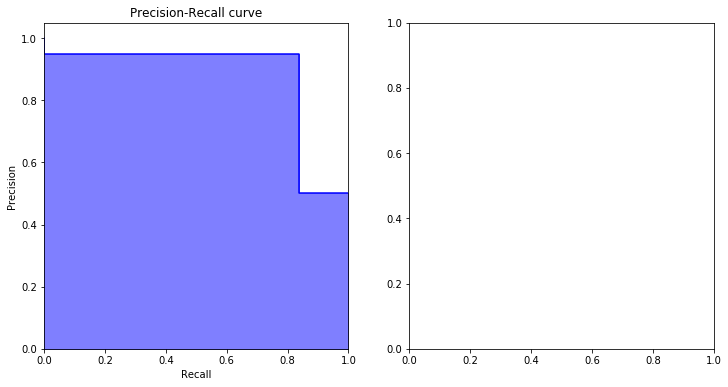

In [12]:
# predict for test set(NB)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
pred_gnb = clf_gnb.predict(x_test)
evaluating(lbl_test, pred_gnb, ax1)

accuracy: 0.9026137817583623


                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.92      0.89      0.90      0.90      0.82     27302
          1       0.91      0.89      0.92      0.90      0.90      0.81     27408

avg / total       0.90      0.90      0.90      0.90      0.90      0.81     54710



[[25036  2266]
 [ 3062 24346]]


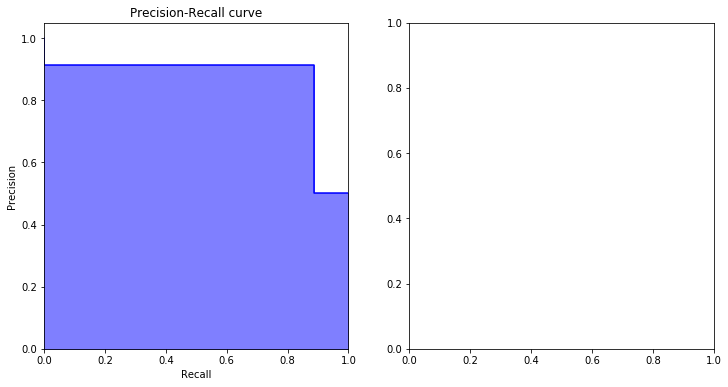

In [13]:
# predict classes for test set(LogisticR)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
y_pred = lr.predict(x_test)
evaluating(lbl_test, y_pred, ax1)

accuracy: 0.9779564978980076


                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.97      0.98      0.98      0.98      0.96     27302
          1       0.97      0.98      0.97      0.98      0.98      0.96     27408

avg / total       0.98      0.98      0.98      0.98      0.98      0.96     54710



[[26598   704]
 [  502 26906]]


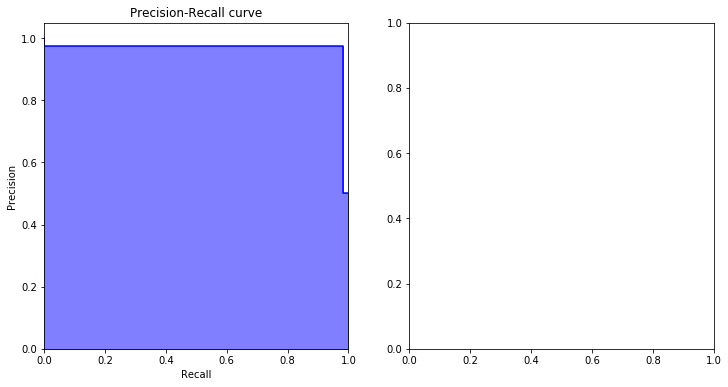

In [15]:
# predict classes for test set(DNN model)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
pred = model.predict_classes(x_test)
evaluating(lbl_test2, pred, ax1)